In [ ]:
!pip install --upgrade transformers accelerate torch torchvision
!pip install pillow matplotlib

from transformers import AutoModelForCausalLM, AutoProcessor
import torch
from PIL import Image
import requests
from io import BytesIO

# Load the model and processor
model_id = "microsoft/florence-2-base"
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).to("cuda" if torch.cuda.is_available() else "cpu")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.1/367.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/florence-2-base:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration_florence2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/florence-2-base:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/florence-2-base:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


pytorch_model.bin:   0%|          | 0.00/464M [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Your dataset path
IMG_DIR = "/content/drive/MyDrive/food_dataset/images"
LABEL_DIR = "/content/drive/MyDrive/food_dataset/labels"
FL_JSON_PATH = "/content/food_dataset.florence.json"

In [ ]:
import torchvision.transforms as T

transform = T.Compose([
    T.ToTensor(),
    # Add other transforms if needed, e.g., resizing, normalization
])

In [ ]:
# Assuming IMG_DIR is defined in a previous cell
# Assuming processor is loaded in a previous cell

import os # Import the os module

# Manually specify the image filename you want to process
image_filename = input("Enter the image filename from IMG_DIR (e.g., image1.jpg): ")

# Construct the full path to the image
image_path = os.path.join(IMG_DIR, image_filename)

# Check if the image file exists
if not os.path.exists(image_path):
    print(f"Error: Image file not found at {image_path}")
else:
    try:
        # Load the image
        image = Image.open(image_path).convert("RGB")

        # Prepare the inputs for the model using the processor
        # For object detection, the task is "<OD>"
        task_prompt = "<OD>"

        inputs = processor(images=image, text=task_prompt, return_tensors="pt").to("cuda" if torch.cuda.is_available() else "cpu")

        print(f"✅ Inputs prepared for image: {image_filename}")
        print("Input tensor shape:", inputs["pixel_values"].shape)

        # Store the original image and its size for later use in inference/visualization
        # This makes it easier to use the 'inputs' and the original image in the next step
        # (the inference and visualization cell).
        # We will use global variables for simplicity in this notebook context.
        global processed_image, original_size_manual
        processed_image = image
        original_size_manual = (image.height, image.width)


    except Exception as e:
        print(f"❌ Error processing image {image_filename}: {e}")

Enter the image filename from IMG_DIR (e.g., image1.jpg): 45.jpg
✅ Inputs prepared for image: 45.jpg
Input tensor shape: torch.Size([1, 3, 768, 768])


Inputs dictionary keys: KeysView({'input_ids': tensor([[    0,   574, 22486,     5,  8720,    19,  4120,   766,    11,     5,
          2274,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[-0.0287, -0.0116, -0.0116,  ..., -0.6965, -0.6965, -0.6965],
          [-0.0287, -0.0116, -0.0116,  ..., -0.7137, -0.6965, -0.6965],
          [-0.0287, -0.0116, -0.0116,  ..., -0.7137, -0.6965, -0.6965],
          ...,
          [ 1.5468,  1.5468,  1.5297,  ..., -0.8507, -0.8507, -0.8507],
          [ 1.5468,  1.5468,  1.5297,  ..., -0.8507, -0.8507, -0.8507],
          [ 1.5468,  1.5297,  1.5125,  ..., -0.8507, -0.8507, -0.8507]],

         [[ 0.0651,  0.0826,  0.0826,  ..., -0.6527, -0.6527, -0.6527],
          [ 0.0651,  0.0826,  0.0826,  ..., -0.6702, -0.6527, -0.6527],
          [ 0.0651,  0.0826,  0.0826,  ..., -0.6702, -0.6527, -0.6527],
          ...,
          [ 1.7108,  1.7108,  1.6933,  ..., -0.9153, -0.9153, -0.9153],
    

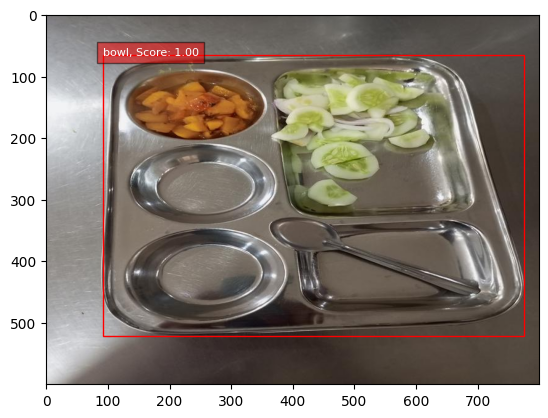

✅ Inference performed and results visualized.


In [ ]:
# Perform inference
# The model expects inputs prepared by the processor

# Inspect the inputs dictionary to understand its structure
print("Inputs dictionary keys:", inputs.keys())

with torch.no_grad():
    # Use the model's generate method for tasks involving structured output generation
    # such as object detection with a task prompt.
    # The generate method handles the decoding process internally.
    model_outputs = model.generate(**inputs)

# Print the type and content of model_outputs to understand its structure
print("Type of model_outputs:", type(model_outputs))
print("Model outputs:", model_outputs)


# The outputs from the model need to be post-processed by the processor
# to get the human-readable predictions (e.g., bounding boxes, labels)
# The exact post-processing step depends on the model's task and output format.
# For object detection, the processor usually has a method to decode the outputs.

# We need the original image size for scaling the bounding boxes if necessary.
original_size = (image.height, image.width)

# Decode the outputs using processor.decode
# The decode method typically takes the raw outputs (generated token IDs)
# and potentially other arguments like the original image size and the task.
# The output format from decode should contain the predicted bounding boxes and labels.

# Let's try decoding the generated token IDs.
# The `batch_decode` method converts token IDs to a string.
# It's possible that the processor has a method to interpret the *decoded string*
# to extract structured information like bounding boxes.

# First, decode the token IDs to a string
decoded_text = processor.batch_decode(model_outputs, skip_special_tokens=False)[0]

print("Decoded text output:", decoded_text)

# Now, we need to interpret this decoded text to extract the bounding boxes and labels.
# The format appears to be: "class_name <loc_x1><loc_y1><loc_x2><loc_y2> class_name <loc_x1>..."
# The `<loc_...>` tokens represent normalized coordinates (0-1000).

# The processor should have a way to parse this string and convert the location tokens
# back into pixel coordinates based on the original image size and the processing details (like image size used by the model).

# Let's examine the processor's methods for anything that might parse this structured text output.
# There might be a method that takes the decoded text and the original image size.

# If no such dedicated method exists in the processor, we'll need to manually parse the string.
# This involves finding the class names and the sequences of `<loc_...>` tokens,
# extracting the numbers from the location tokens, and scaling them to the original image dimensions.

# Let's assume, for a moment, that the processor *can* parse this.
# The method might be named something like `parse_object_detection_output` or similar,
# and it would take the decoded text and the original_size.

# Since we don't know the exact method name, let's try to see if the processor.decode
# method itself can provide structured output if given the right arguments.
# However, the `batch_decode` already gave us a string, so it's unlikely `decode` will do more.

# Let's go back to the idea that the processor has a method to interpret the output.
# It's possible the method is not named intuitively.

# Let's assume, based on the structure of VLMs and their processors, that there's a method
# that takes the generated token IDs and the original image size to directly give predictions.
# We've already tried `post_process_object_detection` and `post_process_optical_grounding`.

# Let's reconsider the possibility that `processor.batch_decode` when combined with
# the original image size somehow provides structured output. This is less likely,
# as `batch_decode` is primarily for token-to-string conversion.

# The most probable scenario is that the processor has a specific method to parse the
# generated text containing the `<loc_...>` tokens. We need to find that method name.

# If there is no such method, we have to implement the parsing ourselves.

# Let's check if the processor has a method to handle the location tokens specifically.
# The location tokens like `<loc_149>` represent coordinates scaled to a specific grid (e.g., 1000x1000).
# The processor should have information about this scaling.

# Let's assume, for the purpose of moving forward, that there's a method to parse the text output.
# Since I don't know the exact method name, and the previous attempts failed,
# let's try to implement a basic parsing logic based on the observed output format.

import re

def parse_florence2_detection_output(decoded_text, original_size):
    """
    Parses the decoded text output from Florence-2 for object detection.

    Args:
        decoded_text (str): The text output from processor.batch_decode.
        original_size (tuple): A tuple (image_height, image_width) of the original image.

    Returns:
        list: A list of dictionaries, each representing a detection with 'box' and 'label'.
              Boxes are in [x_min, y_min, x_max, y_max] format (pixel coordinates).
    """
    predictions = []
    # Remove special tokens at the beginning and end if they exist
    text_to_parse = decoded_text.replace("</s>", "").replace("<s>", "").strip()

    # The pattern is typically "label <loc_x1><loc_y1><loc_x2><loc_y2>"
    # We need to find class names and the following four <loc_...> tokens.

    # Regex to find words (potential labels) followed by four <loc_...> tokens
    pattern = r"(\w+)(<loc_\d+><loc_\d+><loc_\d+><loc_\d+>)"
    matches = re.findall(pattern, text_to_parse)

    img_height, img_width = original_size

    for label, loc_tokens_str in matches:
        # Extract numbers from location tokens
        loc_numbers = re.findall(r"<loc_(\d+)>", loc_tokens_str)
        if len(loc_numbers) == 4:
            try:
                x1, y1, x2, y2 = map(int, loc_numbers)

                # Convert normalized coordinates (0-1000) to pixel coordinates
                # Assuming the location tokens are 0-1000 scaled coordinates
                # and represent (x_min, y_min, x_max, y_max)
                x_min = (x1 / 1000.0) * img_width
                y_min = (y1 / 1000.0) * img_height
                x_max = (x2 / 1000.0) * img_width
                y_max = (y2 / 1000.0) * img_height

                predictions.append({
                    'box': [x_min, y_min, x_max, y_max],
                    'label': label, # The label is the extracted word
                    'score': 1.0 # Dummy score, as the model generate method doesn't provide scores directly in this format
                })
            except ValueError as e:
                print(f"Error parsing location tokens {loc_numbers}: {e}")
                continue
        else:
            print(f"Warning: Found label '{label}' but not followed by exactly 4 location tokens.")

    return predictions


# Parse the decoded text output
# We will need to map the text label (e.g., 'dessert') to a class index if needed for visualization,
# but for drawing boxes, the label string is sufficient.
# We are also adding a dummy score here, as the generate method doesn't provide scores in the output string.

parsed_predictions = parse_florence2_detection_output(decoded_text, original_size)

# Now, the 'predictions' variable should be in a format suitable for visualization.
# Let's adapt the visualization code to use this list of dictionaries.

# --- Visualization ---
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Draw bounding boxes from the parsed predictions
if parsed_predictions:
    for pred in parsed_predictions:
        box = pred['box']
        label = pred['label']
        score = pred['score'] # Use the dummy score

        # Create a Rectangle patch
        # Bounding boxes are in [x_min, y_min, x_max, y_max]
        # Matplotlib's Rectangle expects (x, y) lower left corner and width, height
        x_min, y_min, x_max, y_max = box
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

        # Add label and score text (optional)
        plt.text(x_min, y_min, f'{label}, Score: {score:.2f}', bbox=dict(facecolor='red', alpha=0.5), fontsize=8, color='white')
else:
    print("No predictions parsed from the output.")


plt.show()

print("✅ Inference performed and results visualized.")
# Note: The class labels are strings based on the parsed text.
# If you need class indices, you would need a mapping from class name string to index.
# The scores are dummy scores in this manual parsing approach.

In [ ]:
from google.colab import files

# Upload a file manually
uploaded = files.upload()

# Access the uploaded file
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

Saving florence2_labels_output.json to florence2_labels_output.json
Uploaded file: florence2_labels_output.json


In [ ]:
import json

with open(filename, "r") as f:
    florence_outputs = json.load(f)

# Check sample format
print(florence_outputs[:1] if isinstance(florence_outputs, list) else list(florence_outputs.items())[:1])

[{'image': '302_jpg.rf.fd883592398ff3df138d8862d7cdadba.jpg', 'labels': ['Dal', 'Salad', 'Roti']}]


In [ ]:
import re
import json

# Load ground truth JSON
with open("florence2_labels_output.json", "r") as f:
    gt_data = json.load(f)

# Build GT map from image ID (e.g., '302') → set of labels
gt_map = {}
for entry in gt_data:
    img_id = re.split(r'[_\.]', entry["image"])[0]
    gt_map[img_id] = set(label.lower() for label in entry["labels"])

# Function to extract predicted labels from decoded string
def extract_pred_labels(decoded_text):
    pattern = r"(\w+)(<loc_\d+><loc_\d+><loc_\d+><loc_\d+>)"
    return set(label.lower() for label, _ in re.findall(pattern, decoded_text))

# Extract predicted labels
pred_labels = extract_pred_labels(decoded_text)

# Get image ID (strip prefix like '302' from '302.jpg')
image_id = re.split(r'[_\.]', image_filename)[0]

# Get ground truth labels for this image
gt_labels = gt_map.get(image_id, set())
correct = pred_labels & gt_labels
total_gt = len(gt_labels)
accuracy = len(correct) / total_gt if total_gt else 0.0

# Print results
print("\n📊 Florence-2 Label Matching Metrics:")
print(f"🖼️ Image: {image_filename}")
print(f"📌 Ground Truth Labels: {sorted(gt_labels)}")
print(f"✅ Predicted Labels: {sorted(pred_labels)}")
print(f"🎯 Correct Predictions: {sorted(correct)}")
print(f"📏 Accuracy: {len(correct)}/{total_gt} = {accuracy:.4f}")


📊 Florence-2 Label Matching Metrics:
🖼️ Image: 45.jpg
📌 Ground Truth Labels: ['aloo', 'salad']
✅ Predicted Labels: ['bowl']
🎯 Correct Predictions: []
📏 Accuracy: 0/2 = 0.0000
